## Allstate Claims Severity
[Kaggle](https://www.kaggle.com/c/allstate-claims-severity)  

![](../images/allstate_banner-660x120.png)
When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect. Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train = pd.read_csv('../input/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [33]:
train.sample(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
118897,371528,A,A,A,A,A,B,A,A,A,...,0.784931,0.82252,0.58325,0.80569,0.832976,0.832658,0.866072,0.676523,762.78,6.638280
154105,480439,A,B,A,B,A,A,A,A,B,...,0.534644,0.39455,0.38249,0.74817,0.622276,0.609277,0.723122,0.421608,11010.78,9.306721
89851,281077,A,B,A,B,A,A,A,A,B,...,0.368970,0.36083,0.39849,0.39599,0.422624,0.481306,0.339244,0.238095,3138.08,8.051685
1911,6130,A,A,A,A,A,B,A,A,A,...,0.247077,0.27797,0.32311,0.26029,0.236847,0.233382,0.284958,0.213292,3538.95,8.171868
21305,67070,A,A,A,A,A,B,A,A,A,...,0.395721,0.25461,0.58325,0.66572,0.919361,0.921256,0.315758,0.285489,443.67,6.097332
46309,145369,A,B,B,A,A,A,A,A,B,...,0.378743,0.29758,0.17321,0.21230,0.381398,0.424625,0.749009,0.210438,6981.39,8.851147
84444,264302,A,A,A,A,B,B,A,A,A,...,0.578223,0.67263,0.91183,0.82249,0.837272,0.826178,0.828258,0.730472,5635.83,8.637077
3455,11031,A,B,A,A,A,A,A,A,B,...,0.435129,0.50658,0.35897,0.34424,0.352419,0.345316,0.456775,0.836599,1039.75,6.947697
140918,439668,A,A,A,A,A,B,A,A,A,...,0.591165,0.87437,0.52100,0.61459,0.757468,0.744640,0.768525,0.215109,3124.89,8.047474
162814,507580,A,A,B,A,A,A,A,B,A,...,0.747511,0.25010,0.61154,0.71323,0.415029,0.481306,0.310026,0.357413,1653.88,7.411484


In [36]:
print(list(train.columns))

['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', '

Your goal is predic the value for the `loss` column. Variables prefaced with `cat` are categorical, while those prefaced with `cont` are continuous.

### Let's check is there a missing data?

In [42]:
train.head().isnull().any().any()


False

There're not missing data (organizers prepared data for us).

## Analyze target variable

In [6]:
train['loss'].describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

- There're 188 318 rows (objects).
- Minumum is 0.67 and maxiumum 121 012.25.
- The avarage (mean) is 3037.338
- There's a big difference between 75th and 100th(max), should be long tail by right side.

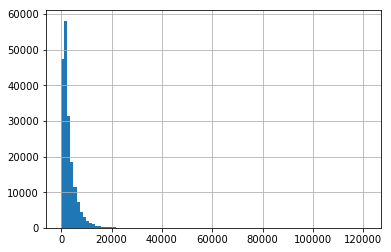

In [7]:
train['loss'].hist(bins=100)

As usually, for those tasks, distrubution is right skewed (long tail by right side) and there're some outliers.

There're few approaches how to manage outliers:
1. remove 1 or 2 % the biggest values (usually this is outliers)
2. transform data by function which is work fine with outliers (e.g. log transformation)

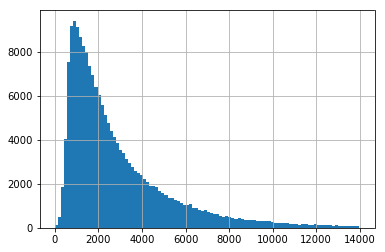

In [9]:
train[ train.loss < np.percentile(train.loss, 99) ]['loss'].hist(bins=100)

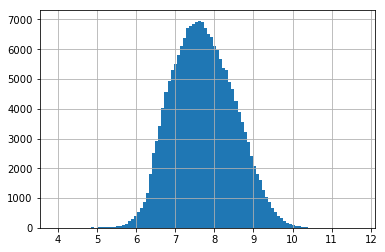

In [48]:
train['log_loss'] = np.log( train['loss'] + 50)
train['log_loss'].hist(bins=100)

## Categorical variables
Has prefix `cat` in the name

In [15]:
cat_feats = [feat for feat in train.columns if 'cat' in feat]
print(len(cat_feats),  cat_feats)

116 ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'ca

There're 116 categorical variables.
Let's check cardinality (how many unique values each category has)

In [16]:
unq_values = [train[cat].nunique() for cat in cat_feats]

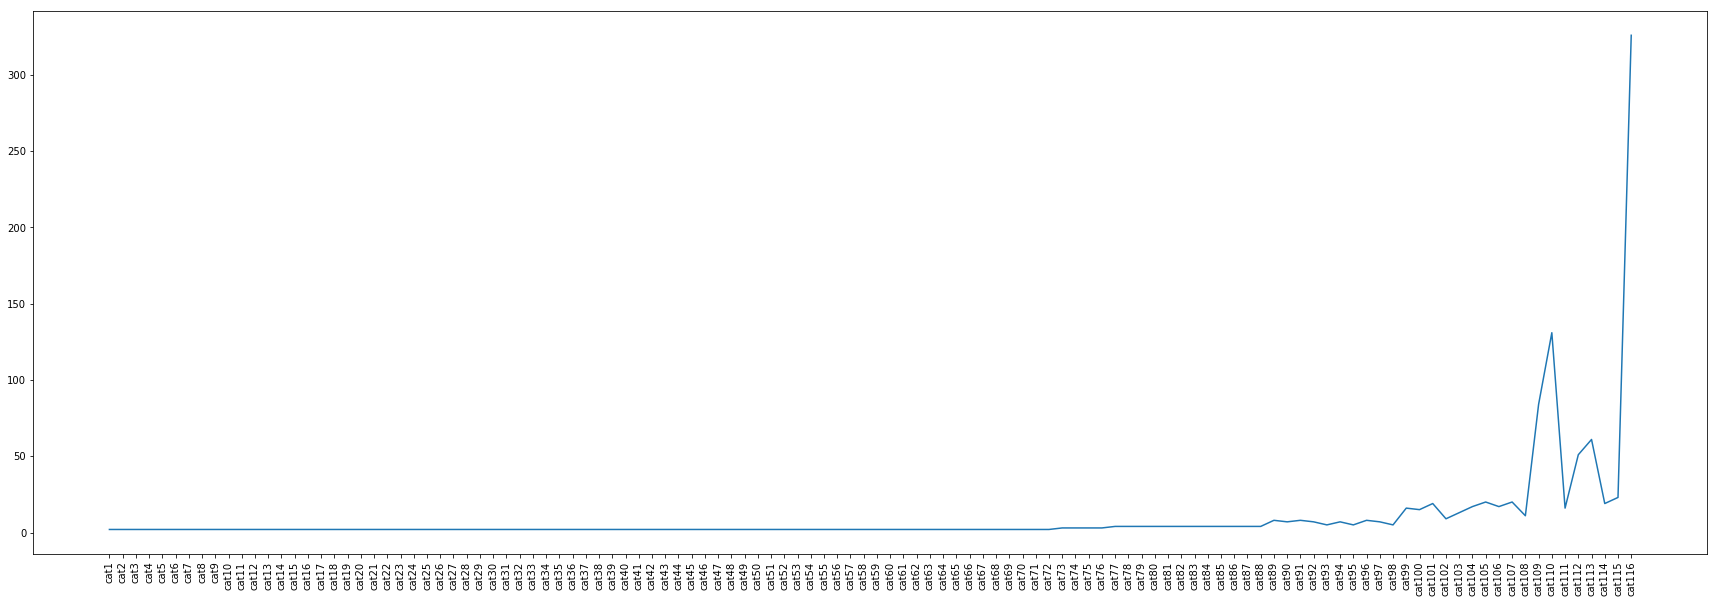

In [21]:
id_cat_feats = range(len(cat_feats))
plt.figure(figsize=(30, 10))
plt.plot(id_cat_feats, unq_values)
plt.xticks(id_cat_feats, cat_feats, rotation='vertical')
plt.show()

Let's remove last 20 elements, to verify how looks like smaller data.

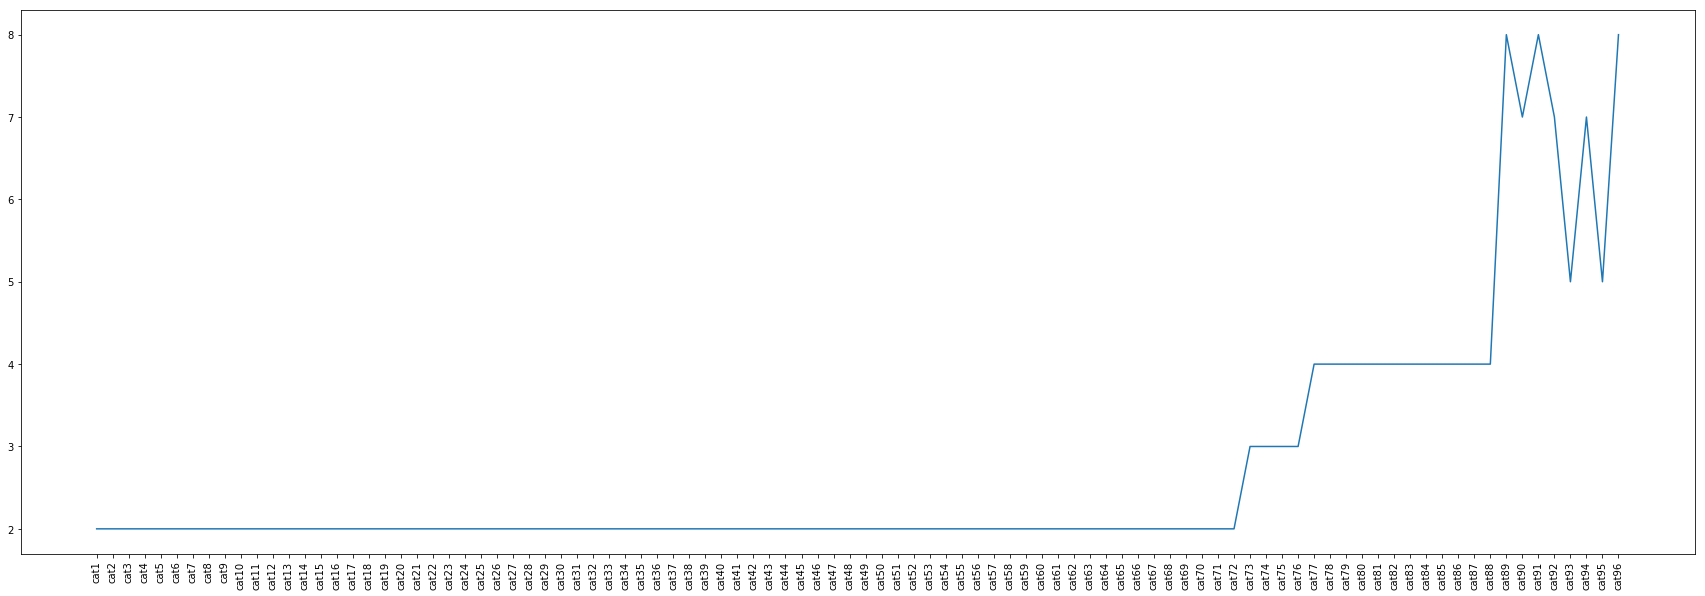

In [22]:
cut_last_elems = 20
plt.figure(figsize=(30, 10))
plt.plot(id_cat_feats[:-cut_last_elems], unq_values[:-cut_last_elems])
plt.xticks(id_cat_feats[:-cut_last_elems], cat_feats[:-cut_last_elems], rotation='vertical')
plt.show()

#### Questions

1. Are there hight cardinality (let say more than 50 unique values)?
2. How many unique values have average categorical variables?
3. How this information could help you?

## Continuous variables
Has prefix `cont` in the name

In [24]:
cont_feats = [feat for feat in train.columns if 'cont' in feat]
print(len(cont_feats),  cont_feats)

14 ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']


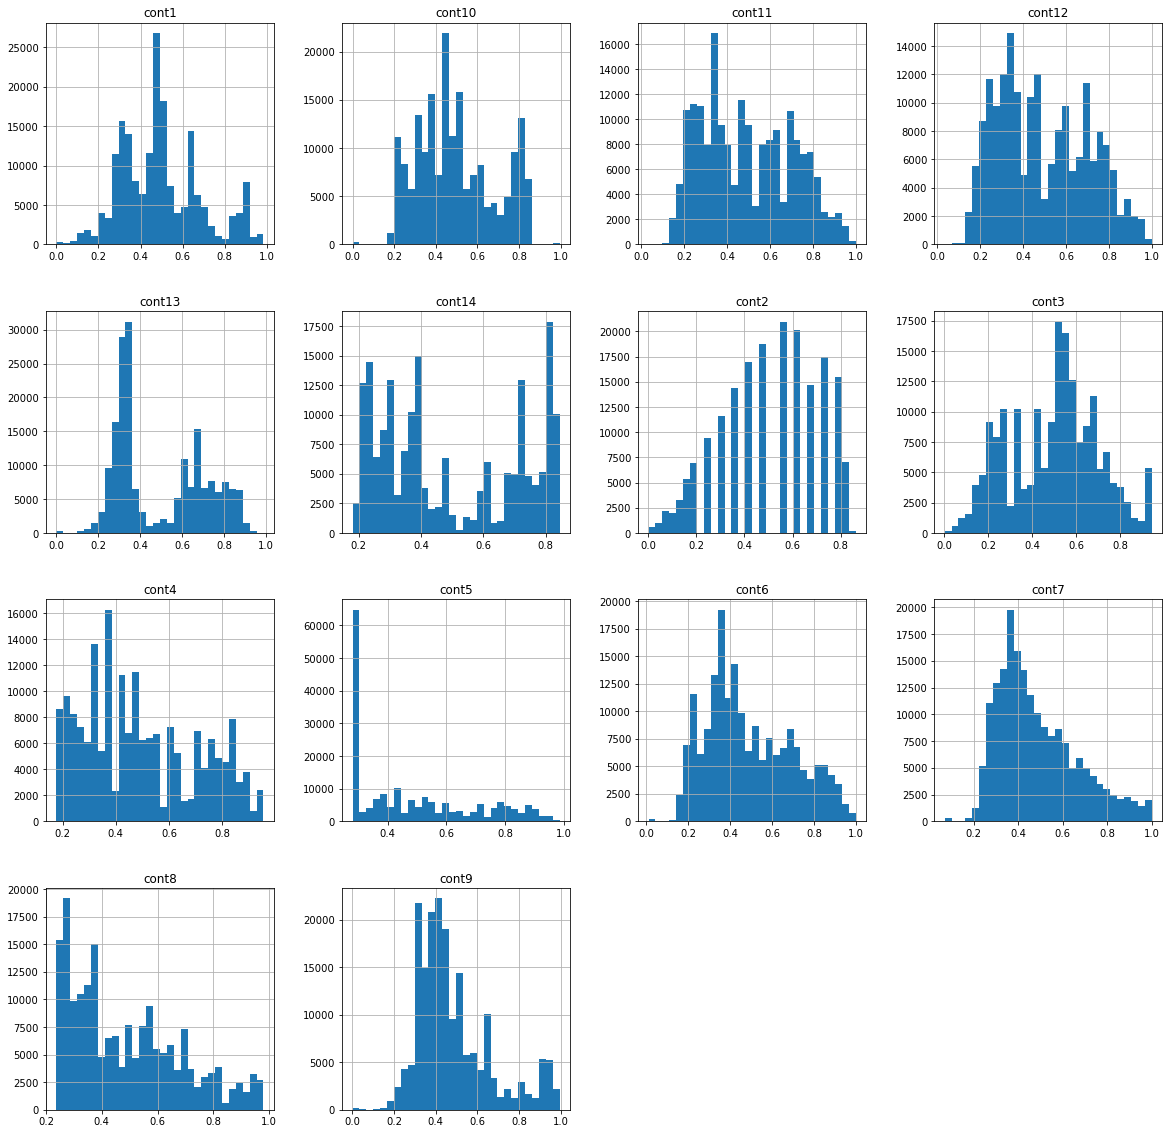

In [27]:
train[ cont_feats ].hist(bins=30, figsize=(20, 20));

What you can say about:
- distributions
- range (min and max)
- outliers

## Evaluation
### [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error)

In practise the means, that you will calculate difference between your prediction and actual value for each points.
Letter sum up all of them and devide by count of points.

What the problem do you know about mae?

## Base Line
Let's build the simplest model

In [28]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

In [31]:
def base_line_model(train, target_variable='loss', strategy='mean'):
    X = train[cont_feats].values
    y = train[target_variable].values

    model = DummyRegressor(strategy=strategy)
    model.fit(X, y)
    y_pred = model.predict(X)

    if target_variable == 'log_loss':
        y = np.exp(y) - 1
        y_pred = np.exp(y_pred) - 1
        y_pred[ y_pred < 0 ] = 0

    score = mean_absolute_error(y, y_pred)
        
    return score

for strategy in ['mean', 'median']:
    for target_variable in ['loss', 'log_loss']:
        score = base_line_model(train, target_variable=target_variable, strategy=strategy)
        print(strategy, target_variable, score)

mean loss 1966.16528556
mean log_loss 1809.84698237
median loss 1809.04878647
median log_loss 1809.04878647
